In [1]:
import pandas as pd

data = pd.read_csv("battles_data_cleaned.csv")
data.head()


,turn,language,is_code,is_refusal,model,sum_user_tokens,sum_assistant_tokens,context_tokens,dedup_tag_high_freq,dedup_tag_sampled,tstamp_period,information_fulfillment,Math,specificity,domain_knowledge,complexity,problem_solving,creativity,technical_accuracy,real_world
0,1,French,False,False,gemma-2-2b-it,19,328,19,False,True,2024-08-04,True,False,True,True,False,True,True,False,True
1,3,English,False,False,athene-70b-0725,51,1846,1434,False,True,2024-08-04,True,False,True,True,True,True,False,True,True
2,6,Italian,False,False,athene-70b-0725,472,3504,3396,False,True,2024-08-04,False,False,False,True,False,True,True,True,True
3,2,English,False,False,llama-3-70b-instruct,84,1047,580,False,True,2024-08-04,True,False,True,True,False,True,False,True,True
4,1,French,False,False,gpt-4-turbo-2024-04-09,29,556,29,False,True,2024-08-04,False,False,True,True,False,False,False,True,True


In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
data.describe()

,turn,sum_user_tokens,sum_assistant_tokens,context_tokens
count,71695.000000,71695.000000,71695.000000,71695.000000
mean,1.318376,247.751782,617.377725,407.912086
std,1.331086,1053.891050,1112.554016,1639.776777
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,17.000000,148.000000,18.000000
50%,1.000000,41.000000,405.000000,45.000000
75%,1.000000,129.000000,744.000000,232.000000
max,50.000000,80670.000000,80078.000000,142240.000000


In [4]:
data.head()

,turn,language,is_code,is_refusal,model,sum_user_tokens,sum_assistant_tokens,context_tokens,dedup_tag_high_freq,dedup_tag_sampled,tstamp_period,information_fulfillment,Math,specificity,domain_knowledge,complexity,problem_solving,creativity,technical_accuracy,real_world
0,1,French,False,False,gemma-2-2b-it,19,328,19,False,True,2024-08-04,True,False,True,True,False,True,True,False,True
1,3,English,False,False,athene-70b-0725,51,1846,1434,False,True,2024-08-04,True,False,True,True,True,True,False,True,True
2,6,Italian,False,False,athene-70b-0725,472,3504,3396,False,True,2024-08-04,False,False,False,True,False,True,True,True,True
3,2,English,False,False,llama-3-70b-instruct,84,1047,580,False,True,2024-08-04,True,False,True,True,False,True,False,True,True
4,1,French,False,False,gpt-4-turbo-2024-04-09,29,556,29,False,True,2024-08-04,False,False,True,True,False,False,False,True,True


## EDA

### Distribution of Models, Count of Different Languages with More than 50 Occurrences, Distribution of Boolean Features (is_code, is_refusal, etc.)

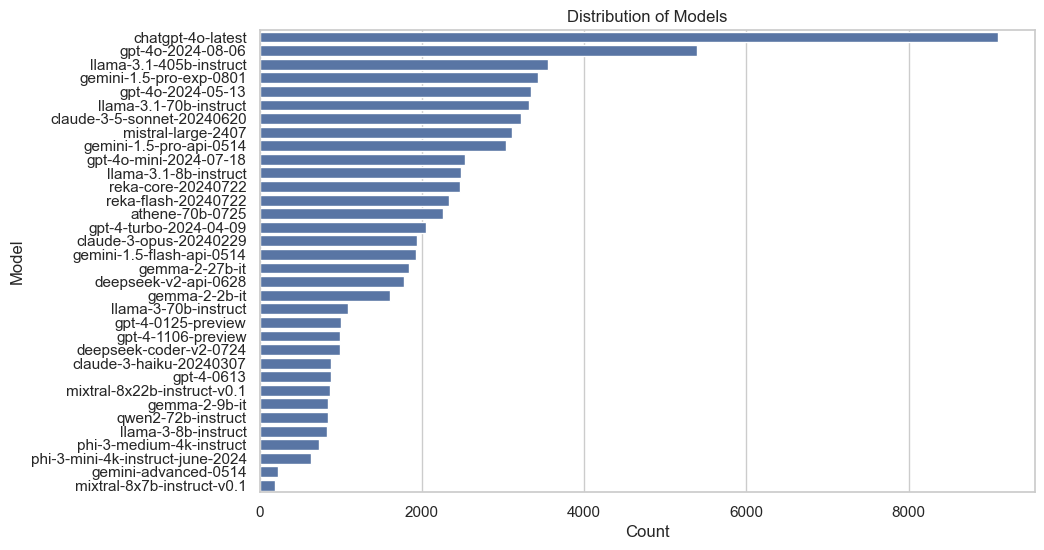

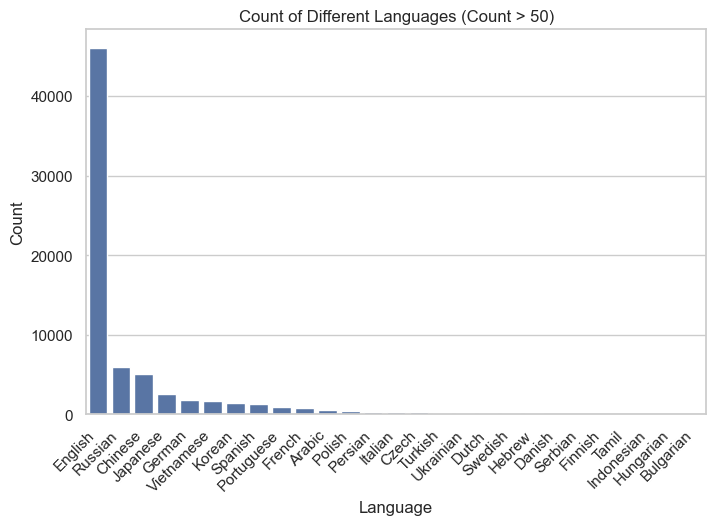

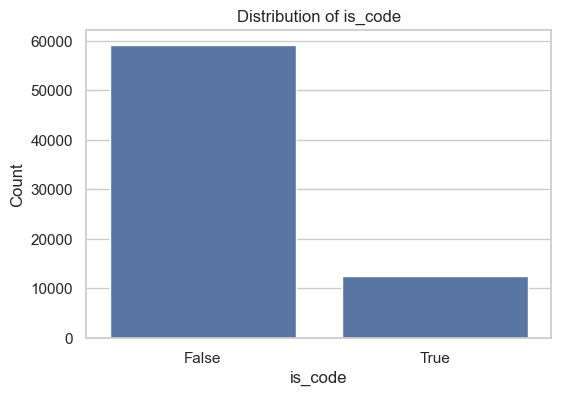

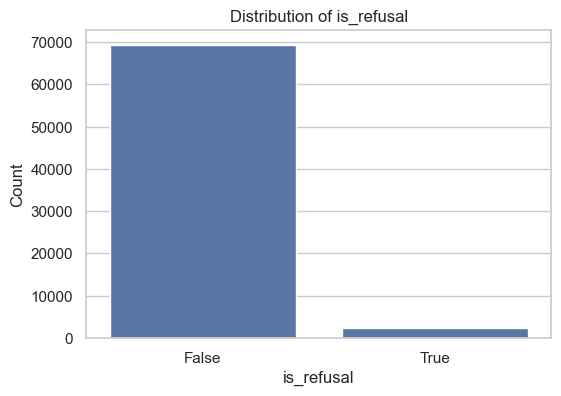

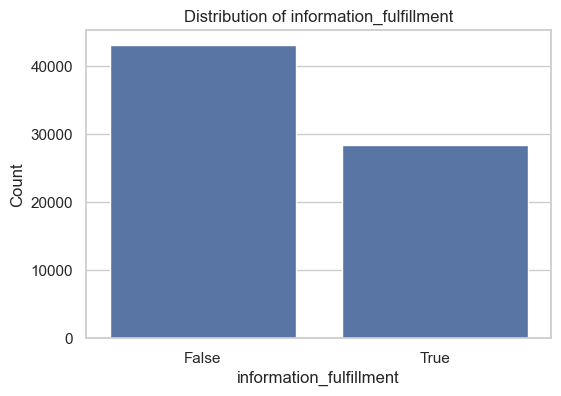

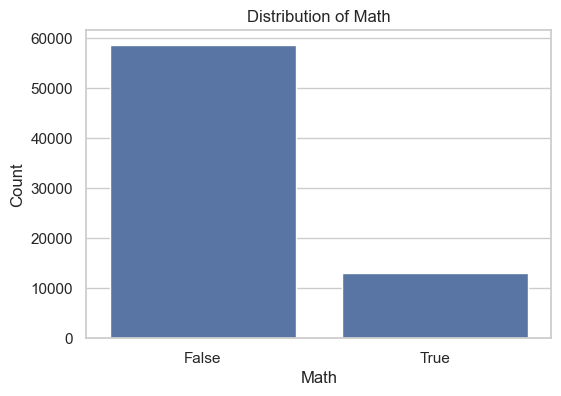

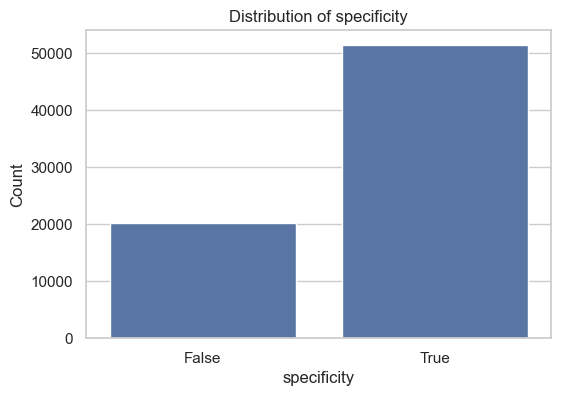

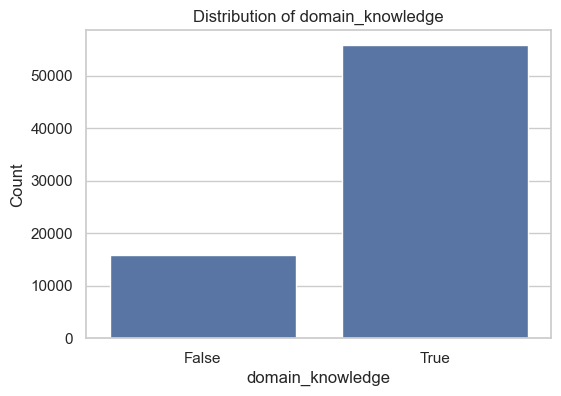

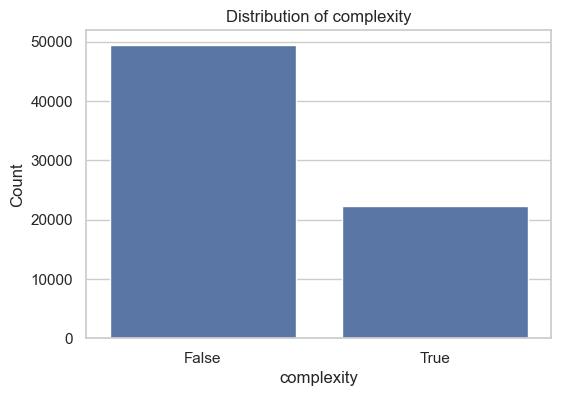

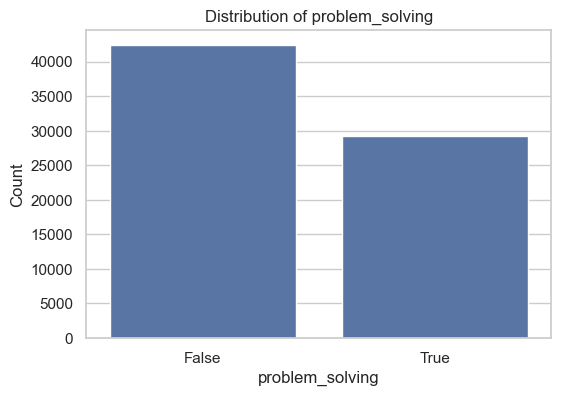

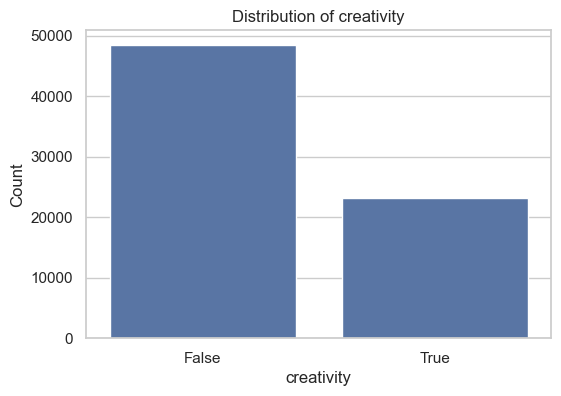

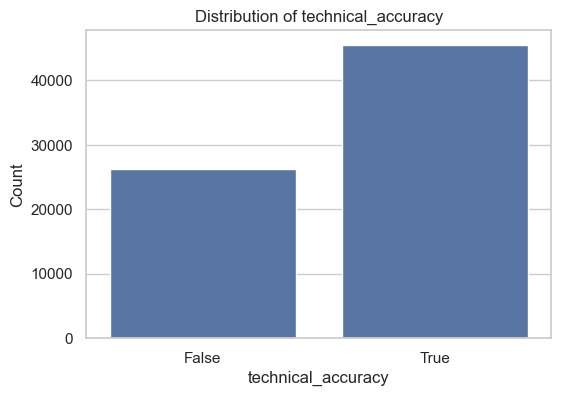

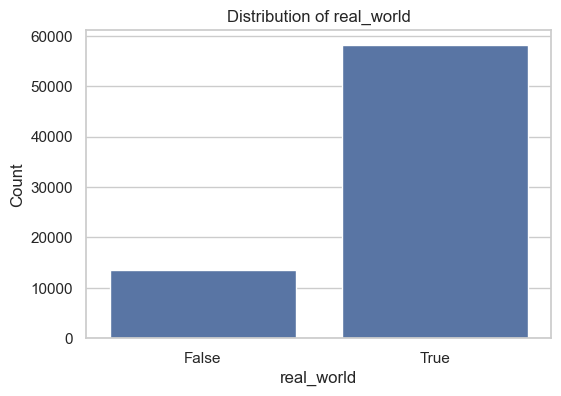

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# 1. Bar plot for the distribution of models
plt.figure(figsize=(10,6))
sns.countplot(y='model', data=data, order=data['model'].value_counts().index)
plt.title('Distribution of Models')
plt.xlabel('Count')
plt.ylabel('Model')
plt.show()

# 2. Bar plot for the count of different languages with rotated x-axis labels
# Filter the data to only include languages with a count greater than 50
language_counts = data['language'].value_counts()
languages_above_50 = language_counts[language_counts > 50].index

# Create a filtered dataset with only those languages
filtered_data = data[data['language'].isin(languages_above_50)]

# Plot the bar plot for languages with count more than 50
plt.figure(figsize=(8,5))
sns.countplot(x='language', data=filtered_data, order=languages_above_50)
plt.title('Count of Different Languages (Count > 50)')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.show()

# 3. Bar plots for boolean columns (is_code, is_refusal, information_fulfillment, etc.)
boolean_columns = ['is_code', 'is_refusal', 'information_fulfillment', 'Math', 'specificity', 
                   'domain_knowledge', 'complexity', 'problem_solving', 'creativity', 
                   'technical_accuracy', 'real_world']

for col in boolean_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In the plot distribution of models it visualizes which models is most frequent and which is less common. Each bar represents a model, and its length corresponds to the count of occurrences of that model.

The second plot represents the count of different languages that have more than 50 counts. We are filtering out languages with only more than 50 counts because plots will make easier to focus on the more frequently occurring ones or else the plot will be clumsy.

The rest of the graph explains the Boolean Columns 
- is_code: There is higher count in False which indicates that it's not associated with code or programming tasks where it suggesting a focus on non-technical content.
- is_refusal: There is higher count in False which indicates that input was accepted where users are responsive to input.
- information_fulfillment: There is higher count in False which indicates that the model information needs were not met.
- math: There is higher count in False which indicates that lack of mathematical proficiency where suggesting that it does'nt involve mathematical reasoning.
- specificity: There is higher count in True which indicates that the  model information is specific, which provides detailed insights.
- domain_knowledge: There is higher count in True which indicates that the model content is strong in particulars field.
- complexity:  There is higher count in False which indicates that the complexity of the topic is addressed which is straightforward means simpler approach to question.
- problem_solving: There is higher count in False which indicates that the No problem-solving is clear, which may indicate there is a lack of critical thinking.
- critical thinking: There is higher count in False which indicates that there is a lack of creativity in the model showed in the response.
- technical_accuracy: There is higher count in True which indicates that model provides the technical information is accurate and reliable.
-  real_world: There is higher count in True which indicates that the model content connects with real-world applications.

### Distribution of User Tokens, Assistant Tokens and Context Tokens 

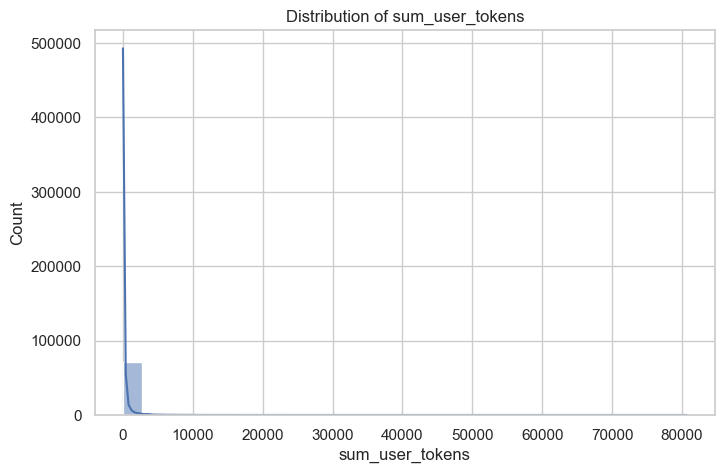

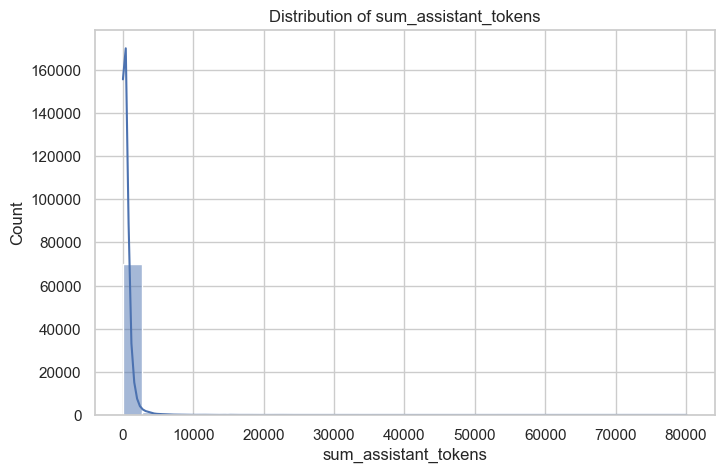

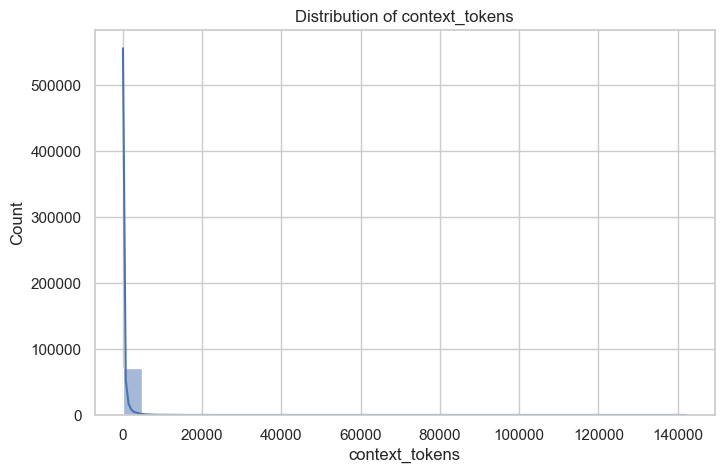

In [6]:
# Set the theme for the plots
sns.set_theme(style="whitegrid")

# 1. Histogram for sum_user_tokens
plt.figure(figsize=(8,5))
sns.histplot(data['sum_user_tokens'], bins=30, kde=True)
plt.title('Distribution of sum_user_tokens')
plt.xlabel('sum_user_tokens')
plt.ylabel('Count')
plt.show()

# 2. Histogram for sum_assistant_tokens
plt.figure(figsize=(8,5))
sns.histplot(data['sum_assistant_tokens'], bins=30, kde=True)
plt.title('Distribution of sum_assistant_tokens')
plt.xlabel('sum_assistant_tokens')
plt.ylabel('Count')
plt.show()

# 3. Histogram for context_tokens
plt.figure(figsize=(8,5))
sns.histplot(data['context_tokens'], bins=30, kde=True)
plt.title('Distribution of context_tokens')
plt.xlabel('context_tokens')
plt.ylabel('Count')
plt.show()

The plot distribution of sum_user_tokens visualizes with the Kernel Density Estimate (KDE) where shows that the majority of the token values are near zero, with a line extending toward higher values 500000. This indicates that most users have relatively low token usage, while a smaller subset has significantly higher usage.

The second plot the distribution of sum_assistant_tokens also visualizes with the Kernel Density Estimate (KDE)  where the majority of assistant_tokens are clustered upto 700000  where the majority of assistant responses involve a small number of tokens, there are occasional responses with a much higher token count.

The third plot distribution of context_tokens also visualizes with the Kernel Density Estimate (KDE) where it's similar to the first plot, where the majority of context_tokens values are near zero and a line extending to the 500000 values. The most contexts involve a small number of tokens, with a few contexts containing significantly more which means that in our dataset, the majority of entries have a low number of tokens (e.g., words, characters, or data units in each context), while only a small number of entries have a much higher token count.

### Proportion of Languages with Over 1000 Occurrences

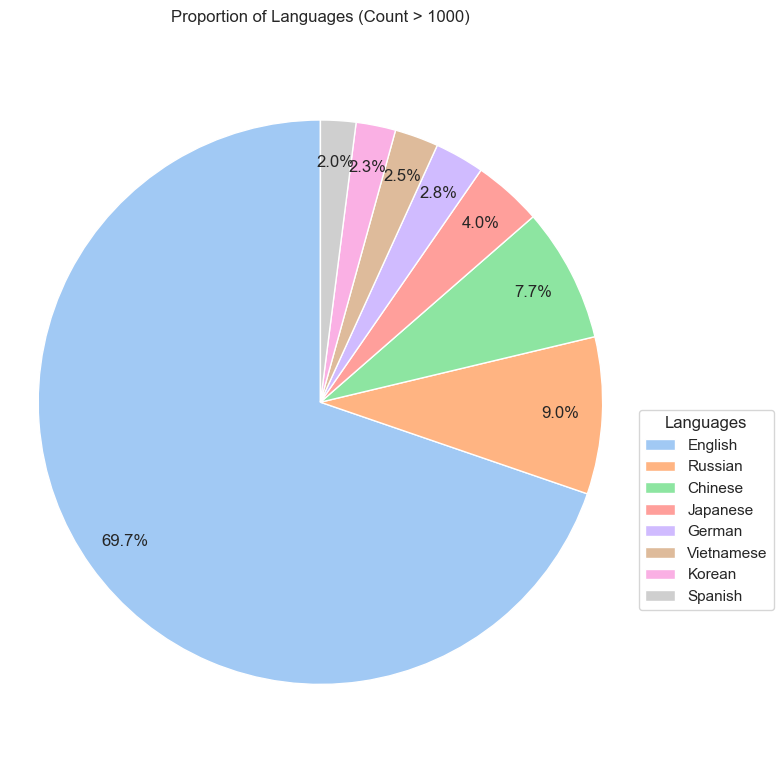

In [7]:
import matplotlib.pyplot as plt

# Count the occurrences of each language
language_counts = data['language'].value_counts()

# Filter the languages to only include those with a count greater than 50
languages_above_50 = language_counts[language_counts > 1000]

# Create a pie chart for the proportion of languages (Count > 50)
plt.figure(figsize=(8,8))
plt.pie(languages_above_50, labels=None, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), pctdistance=0.85)

# Add a legend with labels outside the pie chart
plt.legend(labels=languages_above_50.index, loc="best", bbox_to_anchor=(1, 0.5), title="Languages")
plt.title('Proportion of Languages (Count > 1000)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


The **pie chart** below displays the proportion of languages with over 1000 occurrences in the dataset, with each segment being representative of a language. This is indicated with the size of the slice proportional to the count. The dominant proportion is English at almost 70%, followed by Russian, Chinese, and others.

This plot helps in model development by highlighting the language distribution, with developers focusing on optimizing models for prevalent languages. It also helps in model selection since, while dealing with multilingual tasks, sometimes the model choice needs to be made based on support for a particular language.

### User and Assistant Token Distributions for Models with Over 2000 Occurrences

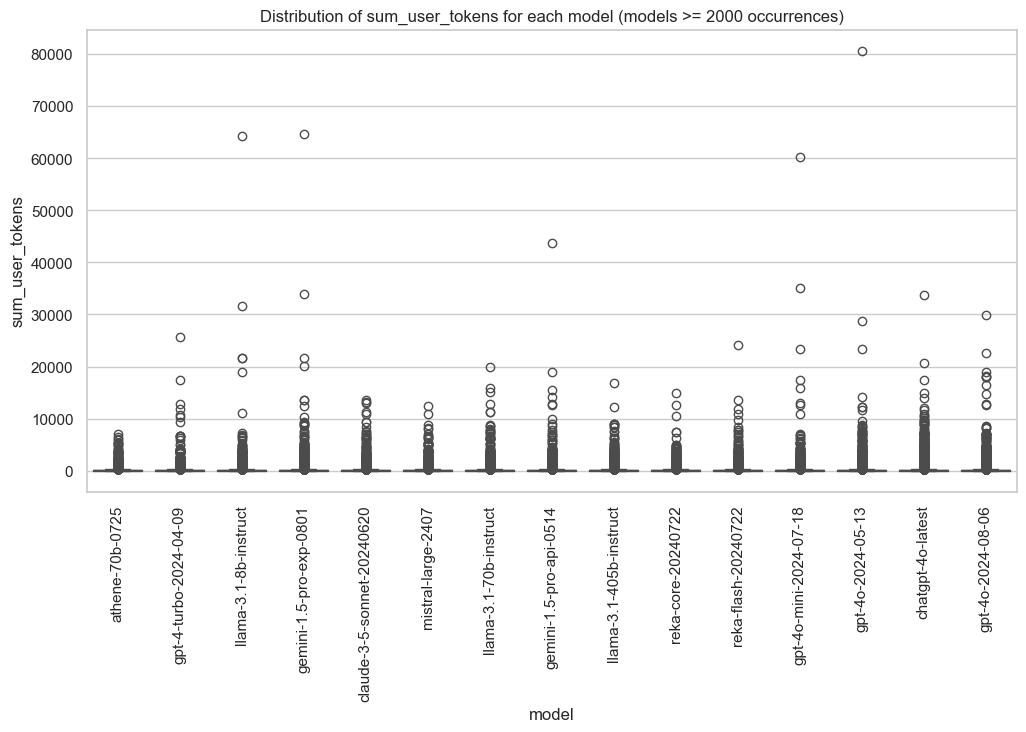

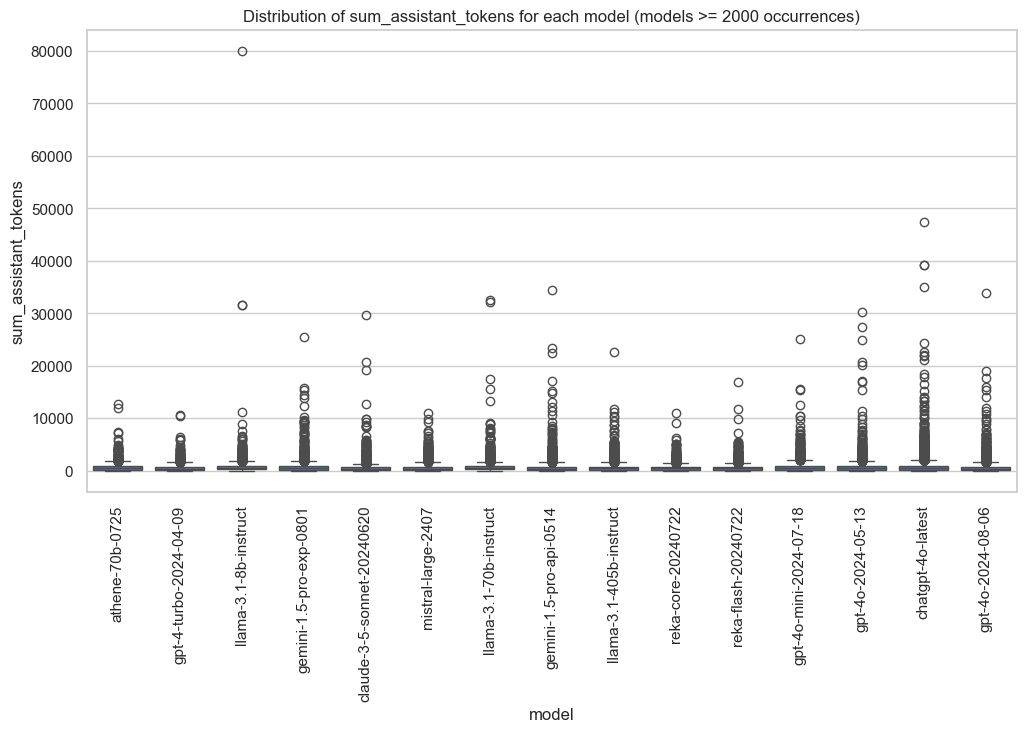

In [73]:
model_counts = data['model'].value_counts()
models_above_2000 = model_counts[model_counts >= 2000].index

# Filter the dataset for these models
filtered_data = data[data['model'].isin(models_above_2000)]

# Set up the plotting grid
plt.figure(figsize=(12, 6))

# Create boxplot for 'sum_user_tokens'
sns.boxplot(x='model', y='sum_user_tokens', data=filtered_data)
plt.xticks(rotation=90)
plt.title('Distribution of sum_user_tokens for each model (models >= 2000 occurrences)')
plt.show()

# Create boxplot for 'sum_assistant_tokens'
plt.figure(figsize=(12, 6))
sns.boxplot(x='model', y='sum_assistant_tokens', data=filtered_data)
plt.xticks(rotation=90)
plt.title('Distribution of sum_assistant_tokens for each model (models >= 2000 occurrences)')
plt.show()

These are **box plots** of the distribution of sum_user_tokens and sum_assistant_tokens for models with at least 2000 occurrences. These box plots depict the dispersion in token usage from each model: the median represented by the central line of the box, interquartile range by the size of the box itself, and possible outliers as dots outside the whiskers.

These plots are useful in the model development stage by underlining token usage consistency and outliers that could be used to optimize the handling of the tokens. They also contribute to model selection by comparing different models based on token efficiency

### Assistant Token Distribution Across Models for Code and Non-Code Inputs

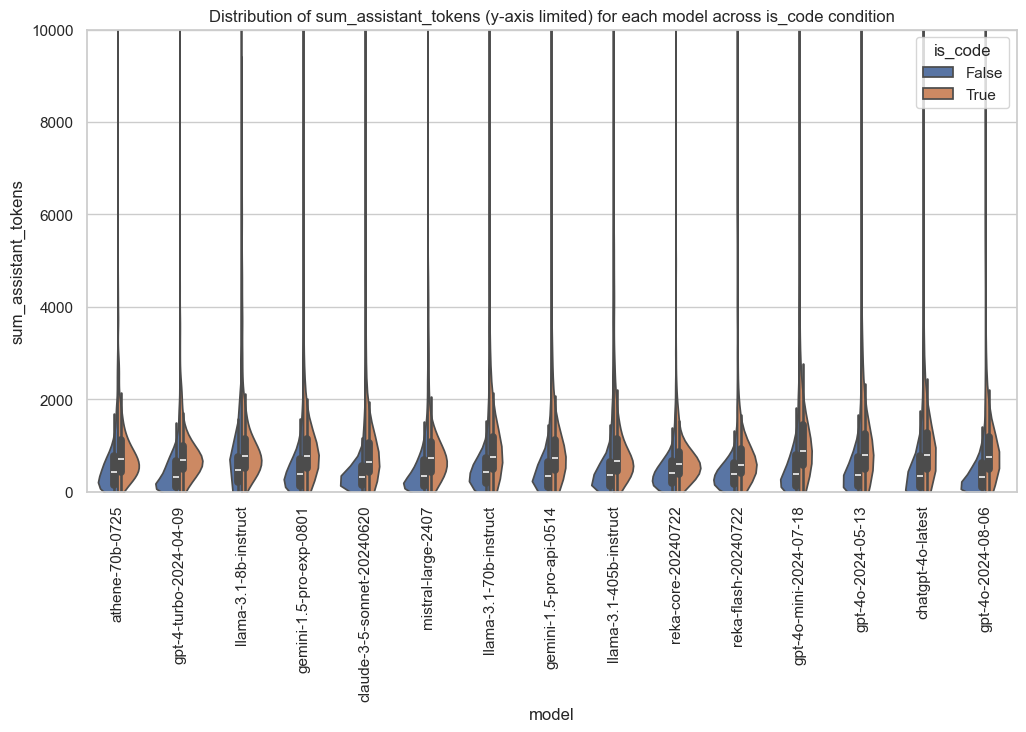

In [75]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='model', y='sum_assistant_tokens', hue='is_code', data=filtered_data, split=True)
plt.ylim(0, 10000)  # Limit the y-axis to a specific range (e.g., 0 to 10,000)
plt.xticks(rotation=90)
plt.title('Distribution of sum_assistant_tokens (y-axis limited) for each model across is_code condition')
plt.show()

The following **violin plot** depicts the distribution of sum_user_tokens for each model, segregated based on the condition if is_code is true or false. The y-axis limits are set to a maximum of 10,000 for better clarity. Herein, the violin plot shows the density and range of token usage; hence, one can get insights about how each model is behaving with and without code input.
This plot helps in model development for understanding the pattern of token usage when handling code and helps in model selection, pointing out those models which manage efficiently with token heavy tasks, more so for code.

### User Token Distribution Across Models for Code and Non-Code Inputs

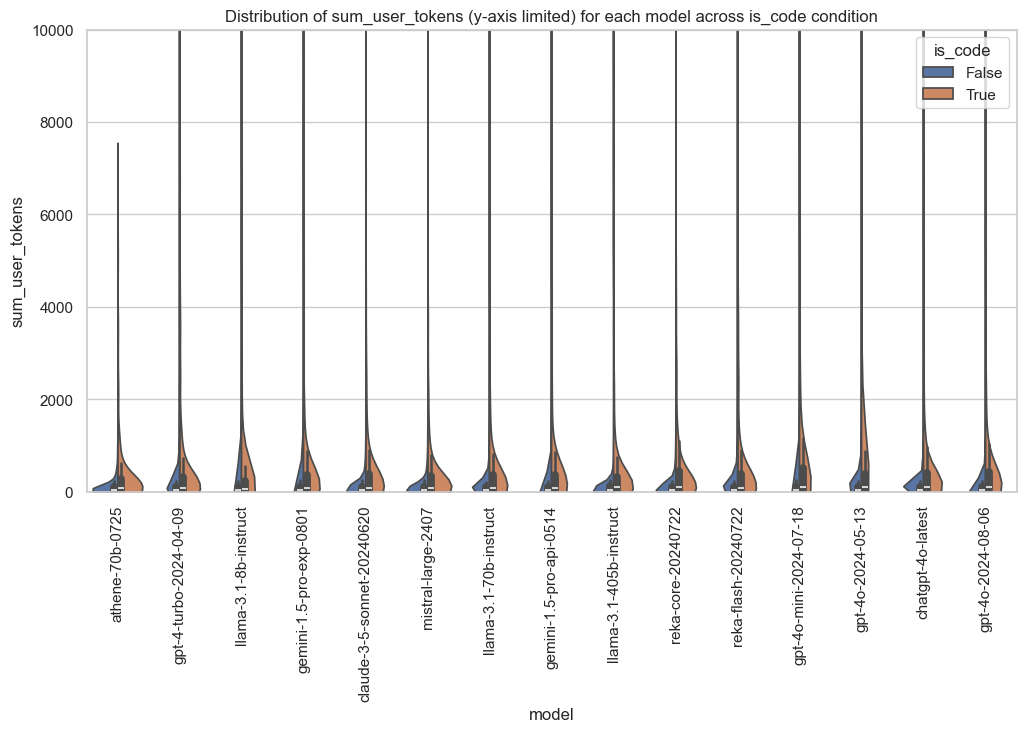

In [77]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='model', y='sum_user_tokens', hue='is_code', data=filtered_data, split=True)
plt.ylim(0, 10000)  # Limit the y-axis to a specific range (e.g., 0 to 10,000)
plt.xticks(rotation=90)
plt.title('Distribution of sum_user_tokens (y-axis limited) for each model across is_code condition')
plt.show()

The following **violin plot** depicts the distribution of sum_user_tokens for each model, segregated based on the condition if is_code is true or false. The y-axis limits are set to a maximum of 10,000 for better clarity. Herein, the violin plot shows the density and range of token usage; hence, one can get insights about how each model is behaving with and without code input.
This plot helps in model development for understanding the pattern of token usage when handling code and helps in model selection, pointing out those models which manage efficiently with token heavy tasks, more so for code

### Correlation Matrix of Token Types

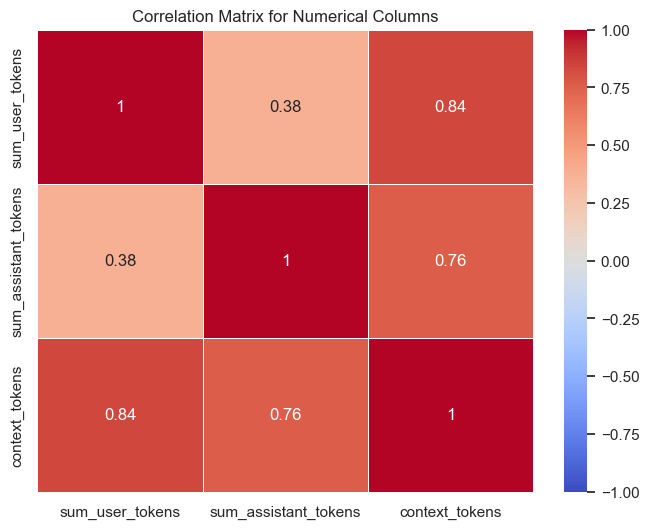

In [11]:
numerical_columns = ['sum_user_tokens', 'sum_assistant_tokens', 'context_tokens']

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

This is a **heatmap** visualizing the **correlation matrix** for the numerical columns: **sum_user_tokens**, **sum_assistant_tokens**, and **context_tokens**. The color intensity and numbers in the cells show the strength of the correlation that goes from -1.0, meaning negative correlation, up to 1.0, meaning positive. It can be seen from this plot that **context_tokens** are highly positively correlated with **sum_user_tokens** with the value of 0.84, while **sum_assistant_tokens** is moderately correlated with the other columns.

This plot is useful for understanding the relationship of token counts in various model development stages and model selection, if the goal is to tune models according to their token efficiency and correlation patterns.

### User Tokens vs. Assistant Tokens: Comparison by Model and Language Occurrences

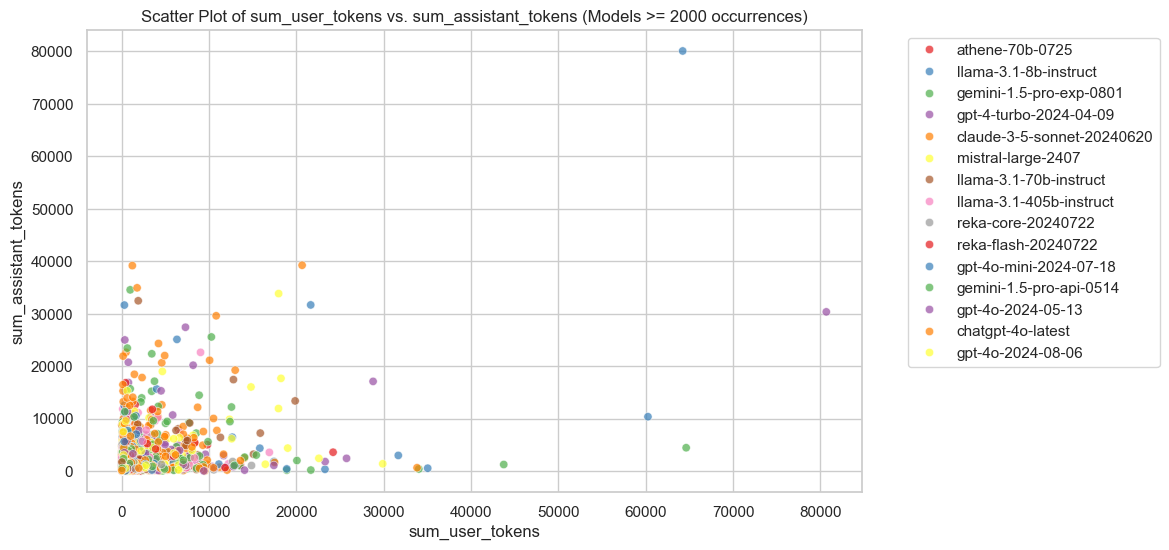

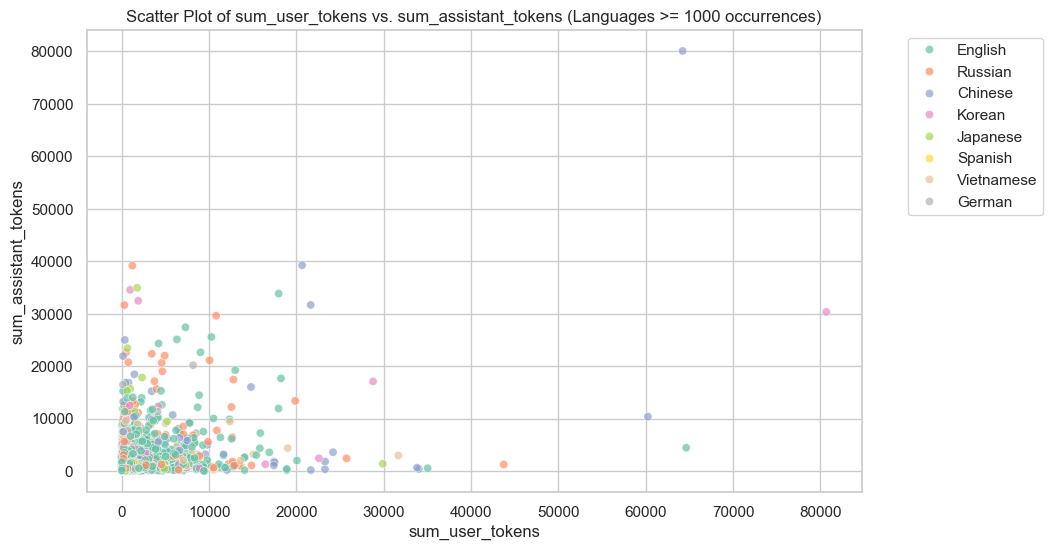

In [12]:
model_counts = data['model'].value_counts()
models_above_2000 = model_counts[model_counts >= 2000].index
filtered_data_model = data[data['model'].isin(models_above_2000)]

# Filter languages with counts greater than or equal to 1000
language_counts = data['language'].value_counts()
languages_above_1000 = language_counts[language_counts >= 1000].index
filtered_data_language = filtered_data_model[filtered_data_model['language'].isin(languages_above_1000)]

# Scatter plot colored by model (for models with counts >= 2000)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sum_user_tokens', y='sum_assistant_tokens', hue='model', data=filtered_data_language, palette='Set1', alpha=0.7)
plt.title('Scatter Plot of sum_user_tokens vs. sum_assistant_tokens (Models >= 2000 occurrences)')
plt.xlabel('sum_user_tokens')
plt.ylabel('sum_assistant_tokens')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Scatter plot colored by language (for languages with counts >= 1000)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sum_user_tokens', y='sum_assistant_tokens', hue='language', data=filtered_data_language, palette='Set2', alpha=0.7)
plt.title('Scatter Plot of sum_user_tokens vs. sum_assistant_tokens (Languages >= 1000 occurrences)')
plt.xlabel('sum_user_tokens')
plt.ylabel('sum_assistant_tokens')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

These are **scatter plots** showing the relationship between user tokens and assistant tokens. The first plot is colored by model, focusing on models with more than 2000 occurrences, while the second plot is colored by language, highlighting languages with more than 1000 occurrences. These plots help identify patterns in token usage across different models and languages.

The plots are useful for model development to optimize token handling based on specific models and languages, and for model selection by determining which models and languages are more efficient or better suited for token-heavy tasks.

### Language Distribution Across Different Models for Multilingual Performance Evaluation

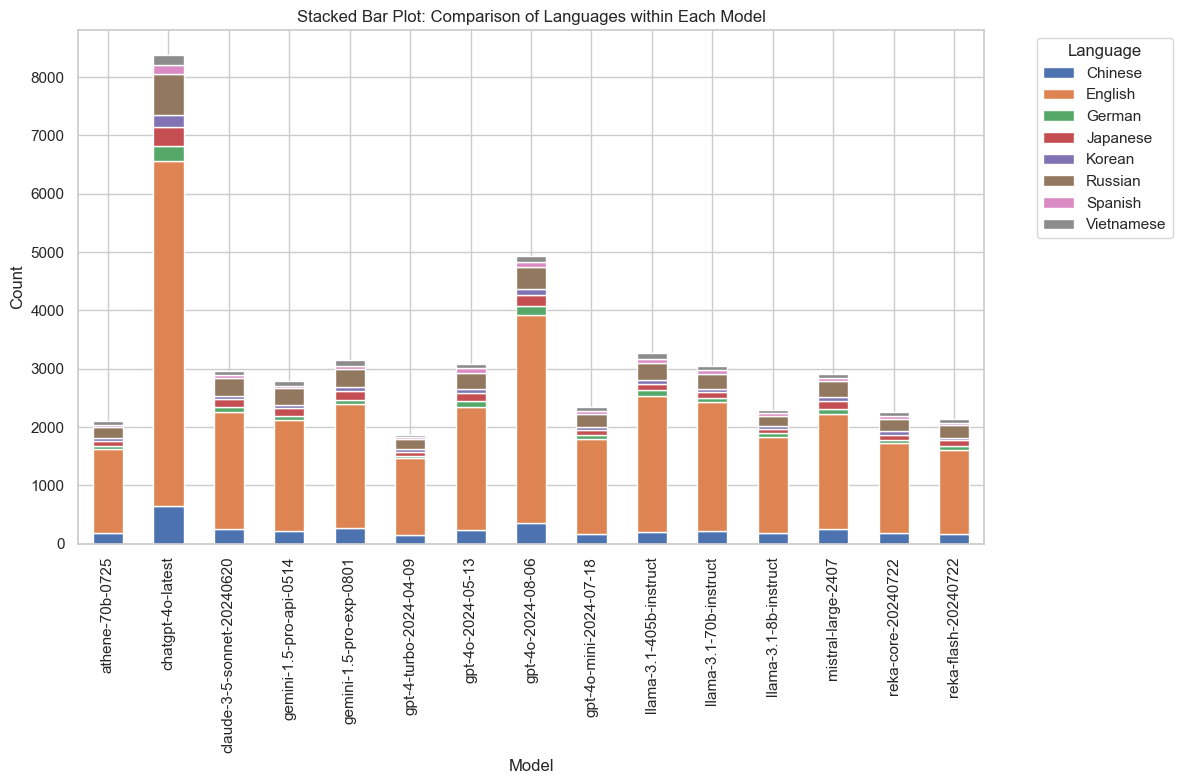

In [13]:
# Filter models with counts greater than or equal to 2000
model_counts = data['model'].value_counts()
models_above_2000 = model_counts[model_counts >= 2000].index
filtered_data_model = data[data['model'].isin(models_above_2000)]

# Filter languages with counts greater than or equal to 1000
language_counts = data['language'].value_counts()
languages_above_1000 = language_counts[language_counts >= 1000].index
filtered_data_language = filtered_data_model[filtered_data_model['language'].isin(languages_above_1000)]

# Create a pivot table with models as rows and languages as columns
pivot_table = filtered_data_language.pivot_table(index='model', columns='language', aggfunc='size', fill_value=0)

# Plot a stacked bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add title and labels
plt.title('Stacked Bar Plot: Comparison of Languages within Each Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This is a **stacked bar plot** showing the distribution of languages across different models. Every bar would illustrate the model, while the hue in that bar will show the counts across different languages, for example, English, Chinese, Spanish. The plot shows how frequently each of the languages appears in interactions for each model, with **English** dominating most of the models.

This plot is useful for both model selection by underlining which models perform well with a particular language, and for model development to determine the language handling capability with the aim of ensuring that the models are optimized for a multilingual task.

### Token Usage Trends Over Time (User, Assistant, and Context Tokens)

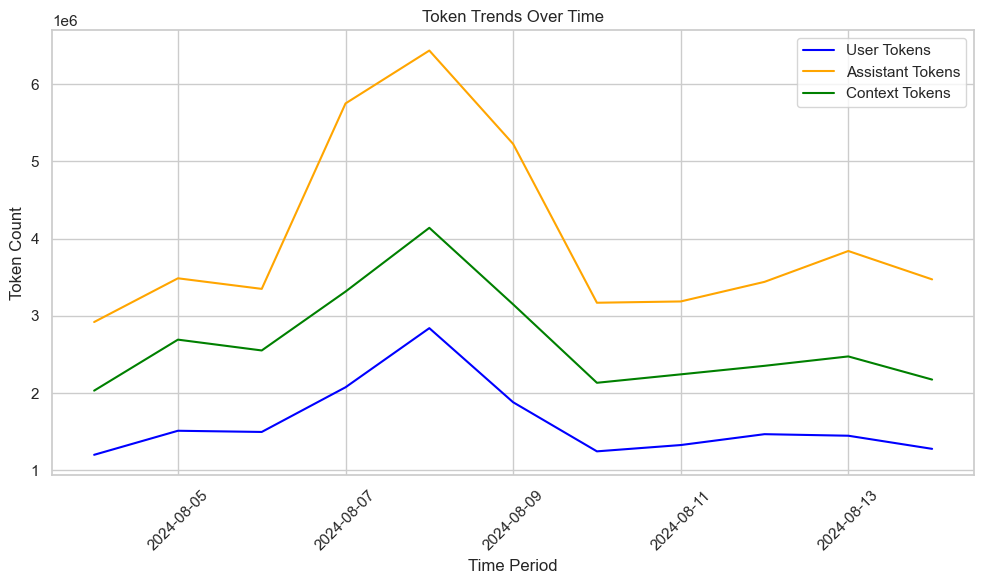

In [14]:
data['tstamp_period'] = pd.to_datetime(data['tstamp_period'])

# Group by tstamp_period and calculate the sum of tokens
time_grouped = data.groupby('tstamp_period').agg({
    'sum_user_tokens': 'sum',
    'sum_assistant_tokens': 'sum',
    'context_tokens': 'sum'
}).reset_index()

# Plot line graph for sum_user_tokens over time
plt.figure(figsize=(10, 6))
plt.plot(time_grouped['tstamp_period'], time_grouped['sum_user_tokens'], label='User Tokens', color='blue')
plt.plot(time_grouped['tstamp_period'], time_grouped['sum_assistant_tokens'], label='Assistant Tokens', color='orange')
plt.plot(time_grouped['tstamp_period'], time_grouped['context_tokens'], label='Context Tokens', color='green')

# Add labels and title
plt.title('Token Trends Over Time')
plt.xlabel('Time Period')
plt.ylabel('Token Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

This is the **line plot** of the trends of user tokens, assistant tokens, and context tokens over time. The x-axis represents the time periods while the y-axis shows the total token count for each category. The orange line (assistant tokens) peaks the highest indicates that assistant models used more tokens compared to user and context tokens.

This will give insight into token usage patterns, helpful in the development of models by keeping track of token efficiency or model selection in finding out which of those models can handle certain token-intensive tasks efficiently over time. It can also assist in the optimization of token management.

### Comparison of Model Refusals (Is_Refusal) for Models with Over 2000 Occurrences

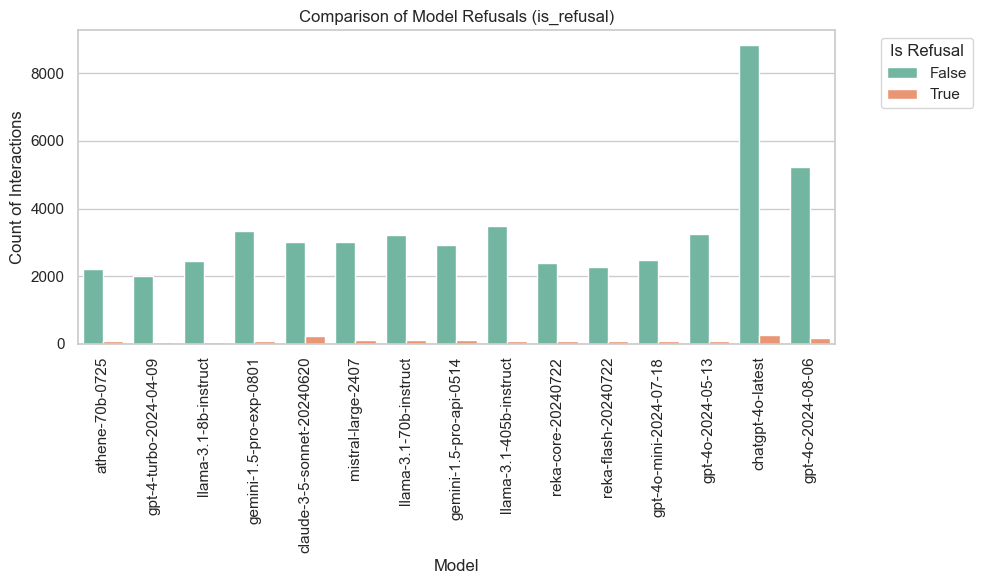

In [15]:
# Filter models with counts greater than or equal to 2000
model_counts = data['model'].value_counts()
models_above_2000 = model_counts[model_counts >= 2000].index
filtered_data_model = data[data['model'].isin(models_above_2000)]

# Create a count plot for is_refusal
plt.figure(figsize=(10, 6))
sns.countplot(x='model', hue='is_refusal', data=filtered_data_model, palette='Set2')

# Add labels and title
plt.title('Comparison of Model Refusals (is_refusal)')
plt.xlabel('Model')
plt.ylabel('Count of Interactions')
plt.xticks(rotation=90)
plt.legend(title='Is Refusal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

A **count plot** comparing the number of interactions for each of the different models, based on whether the model refused to answer (**is_refusal**). Green bars are for interactions where the model responded, and orange bars represent refusals.

This plot helps to identify models that are most likely to refuse responses. For example, the refusal rate of **chatgpt-4-0-latest** is higher. Hence, this would provide guides on model selection: select models that would be more dependable with respect to response, and in model development: investigate why certain models refuse and how to reduce occurrences of such.

In [16]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.4 kB 330.3 kB/s eta 0:00:01
   ------ -------------------------------- 51.2/301.4 kB 525.1 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.1 MB/s eta 0:00:00


### Visualization of Language Distribution

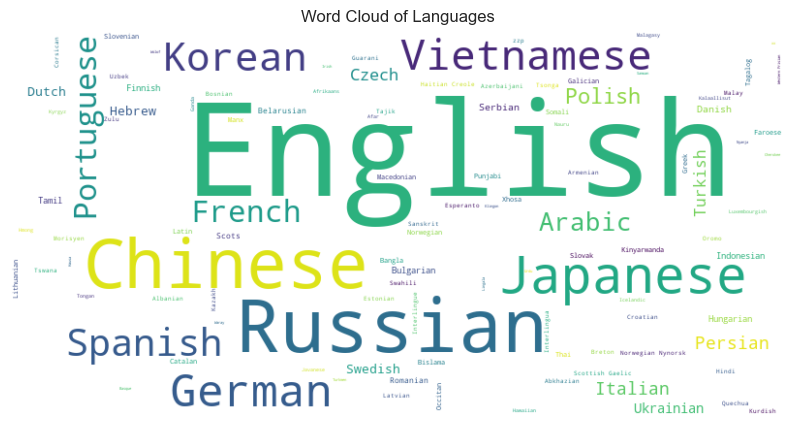

In [17]:
from wordcloud import WordCloud
language_counts = data['language'].value_counts()

# Generate a word cloud for languages
language_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(language_counts)

# Plot the word cloud for languages
plt.figure(figsize=(10, 6))
plt.imshow(language_wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Languages')
plt.show()

The word cloud above visualizes the most common languages in this dataset. In the word cloud, the size of each name in a language represents the frequency of that name within the data. For example, English, Chinese, and Russian are bigger compared to the other names because they occur more frequently in the dataset. Smaller words like Swedish, Dutch, and Tamil represent less frequency. The following visualization effectively shows the distribution and variation that can occur in the use of language in the dataset

### Visualization of Model Distribution

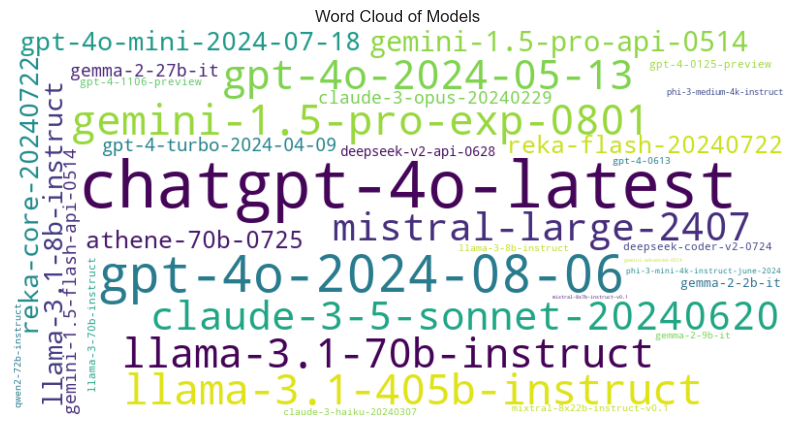

In [18]:
# Count occurrences of each model
model_counts = data['model'].value_counts()

# Generate a word cloud for models
model_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(model_counts)

# Plot the word cloud for models
plt.figure(figsize=(10, 6))
plt.imshow(model_wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Models')
plt.show()

The most frequent, like "chatgpt-4.0-latest", "gpt-4.0-2024-08-06", and "llama-3.1-70b-instruct", are larger since they appear more often.
Less frequency words: The less frequent models, such as "gemini-1.5-pro-api-0514" and "deepseek-v2-api-0628", are in smaller text to show how much less they appear compared to others.

### Token Distribution by Language and Model for Languages with Over 1000 Occurrences

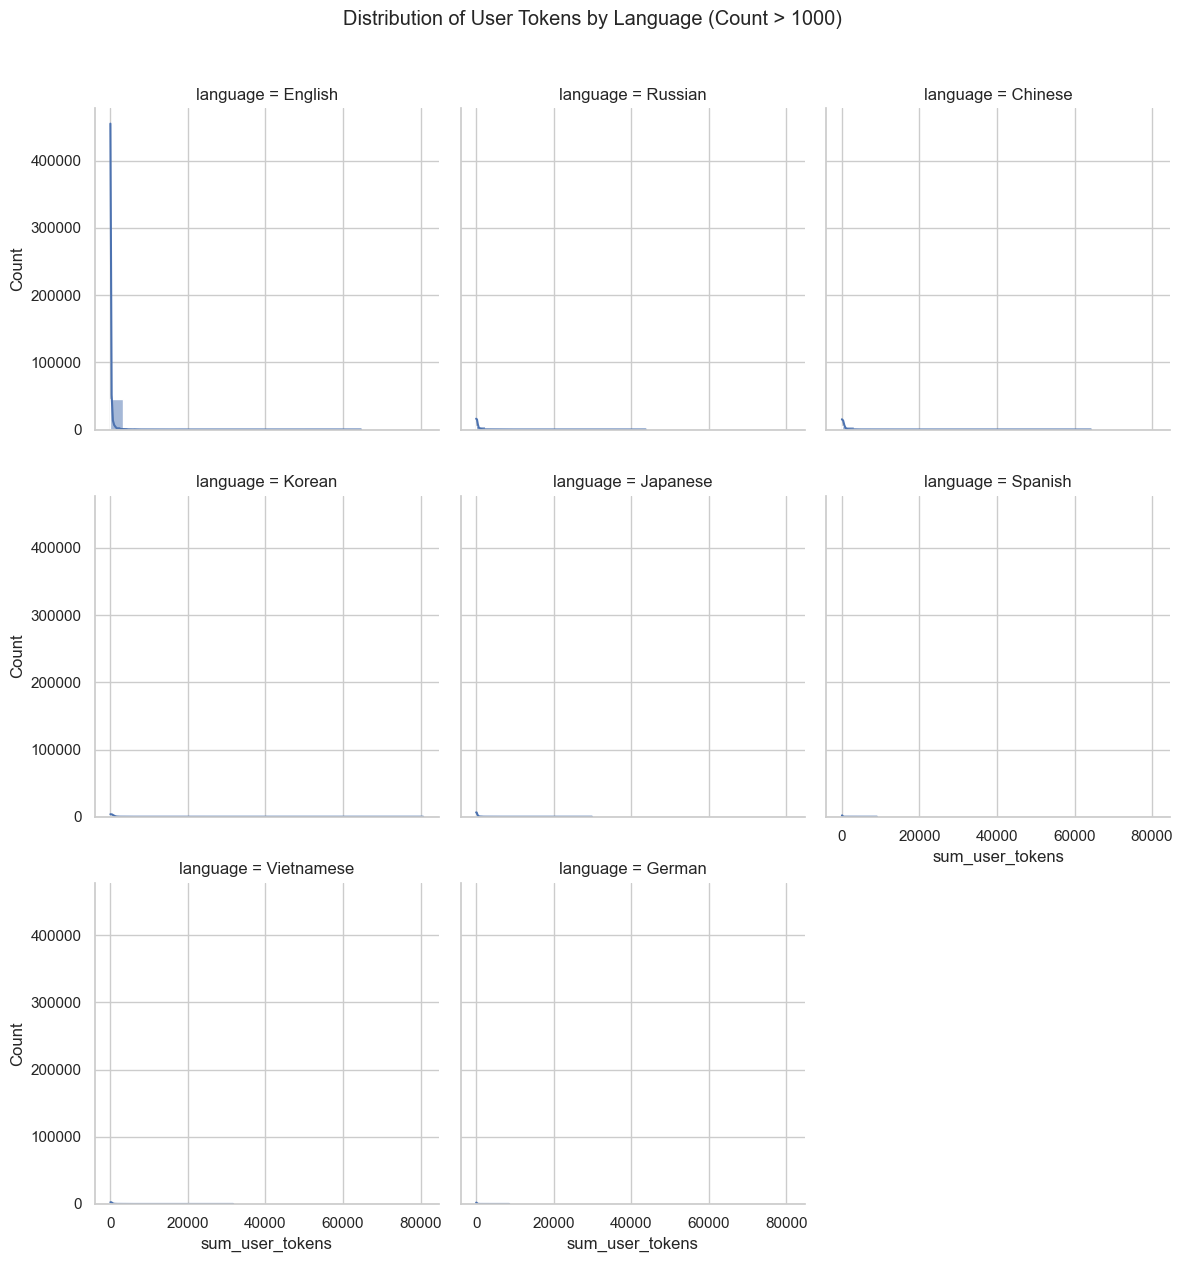

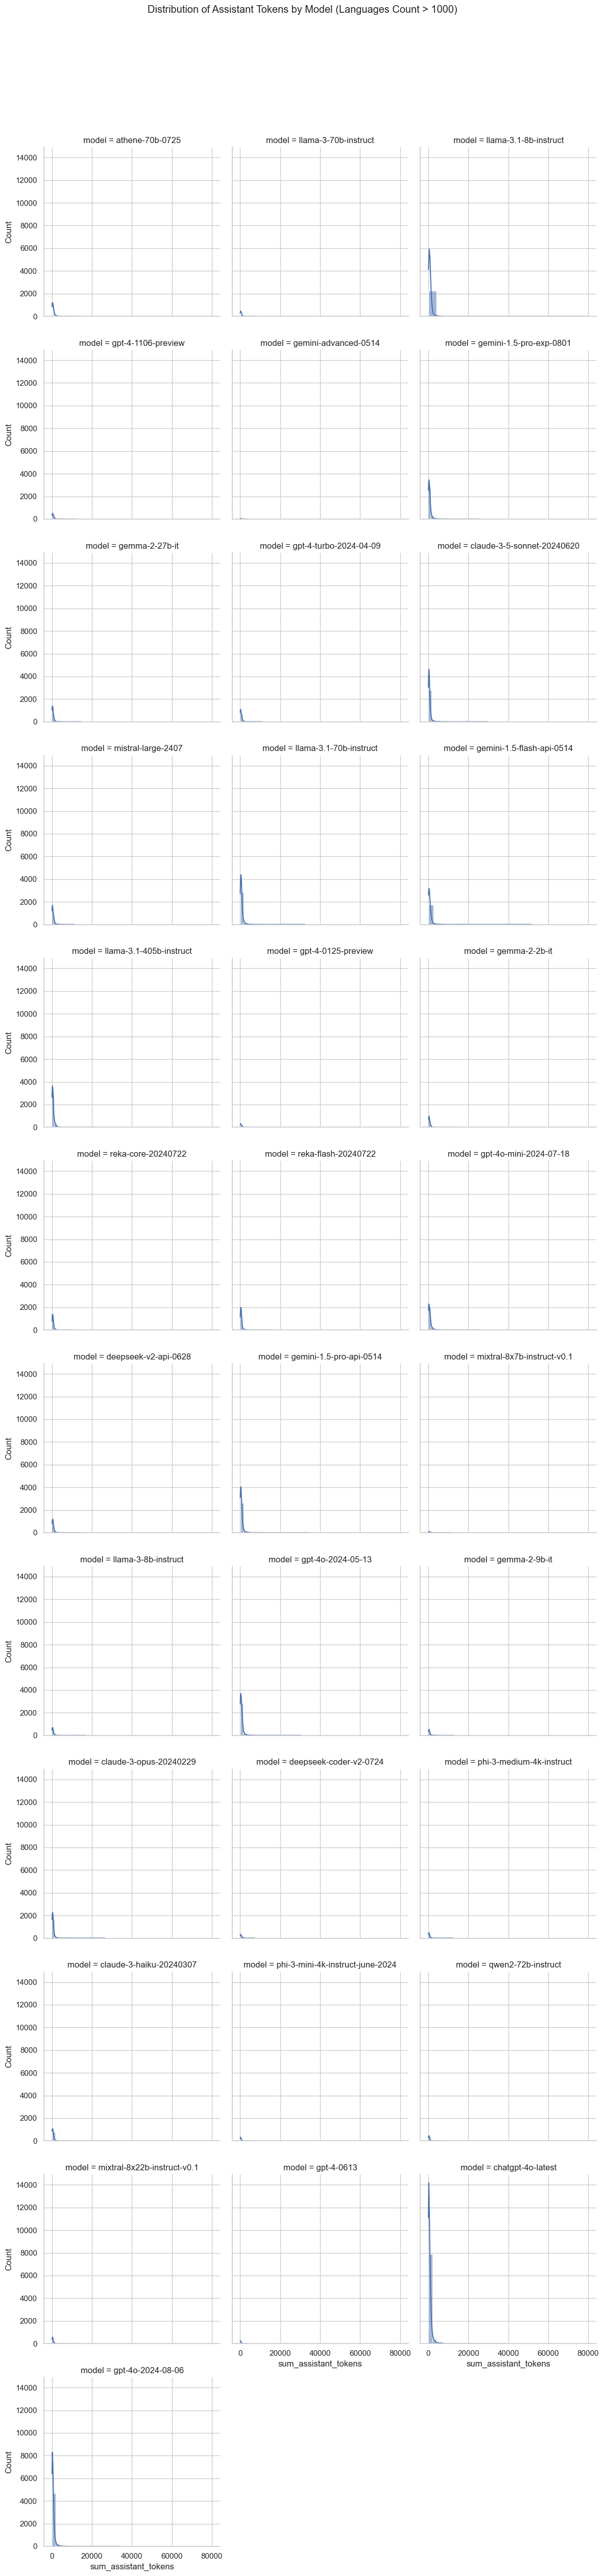

In [28]:
# Filter the dataset to include only languages with a count greater than 1000
language_counts = data['language'].value_counts()
languages_above_1000 = language_counts[language_counts > 1000].index

filtered_data = data[data['language'].isin(languages_above_1000)]

# Set the seaborn style
sns.set(style="whitegrid")

# Example 1: Comparing user token distribution by language (languages with count > 1000)
g = sns.FacetGrid(filtered_data, col="language", margin_titles=True, col_wrap=3, height=4)
g.map(sns.histplot, "sum_user_tokens", kde=True, bins=20)
g.fig.suptitle('Distribution of User Tokens by Language (Count > 1000)', y=1.05)
plt.show()

# Example 2: Comparing assistant token distribution by model (for filtered languages)
g = sns.FacetGrid(filtered_data, col="model", margin_titles=True, col_wrap=3, height=4)
g.map(sns.histplot, "sum_assistant_tokens", kde=True, bins=20)
g.fig.suptitle('Distribution of Assistant Tokens by Model (Languages Count > 1000)', y=1.05)
plt.show()


**Facetgrit** provides a multidimensional analysis in the variation between user and assistant tokens to reach deep insights in both language and model behavior.
Distribution of Assistant Tokens by Model(For the languages which have count value of more than 1000) vs Different LLM Models.

### Distribution of User and Assistant Tokens Across Different Languages

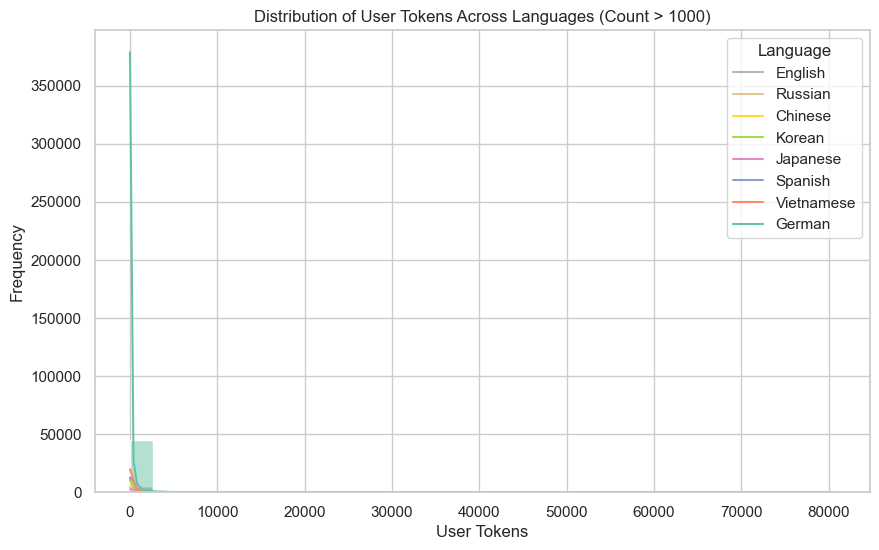

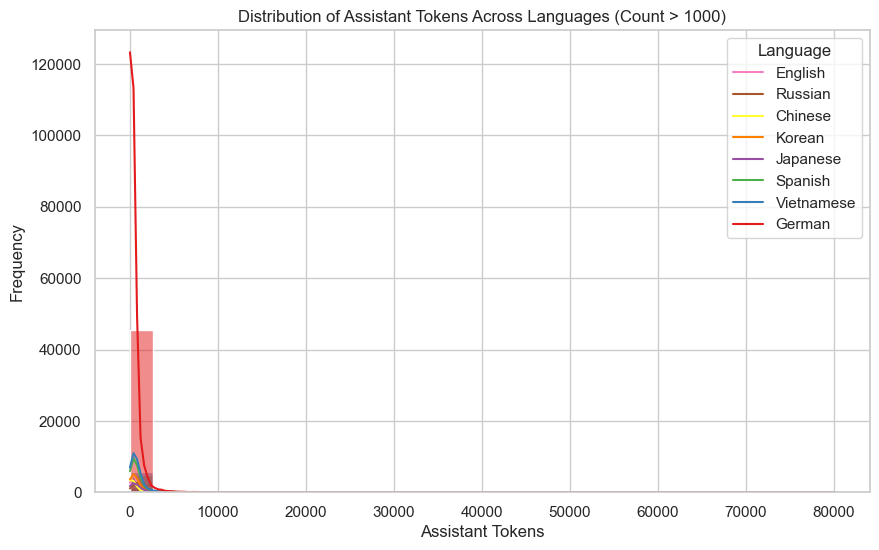

In [31]:
sns.set(style="whitegrid")

# Example 1: Distribution of user tokens for different languages
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="sum_user_tokens", hue="language", kde=True, bins=30, palette="Set2")

# Manually add the legend
plt.title('Distribution of User Tokens Across Different Languages')
plt.xlabel('User Tokens')
plt.ylabel('Frequency')
plt.legend(title="Language", labels=data['language'].unique())  # Explicitly defining the labels
plt.show()

# Example 2: Distribution of assistant tokens for different languages
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="sum_assistant_tokens", hue="language", kde=True, bins=30, palette="Set1")

# Manually add the legend
plt.title('Distribution of Assistant Tokens Across Different Languages')
plt.xlabel('Assistant Tokens')
plt.ylabel('Frequency')
plt.legend(title="Language", labels=data['language'].unique())  # Explicitly defining the labels
plt.show()

These are **histograms** with a kernel density estimate, showing the distribution of user tokens(top plot), and assistant tokens(bottom plot), across languages that have more than 1000 occurrences. Both plots reveal that for the majority of the interactions, regardless of language, just a few tokens are involved, between 0 and 10,000 tokens, with some outliers at higher token counts. Going a step further, we can try to explore language-specific differences or outliers in token usage that might indicate the trends in longer conversations for the next level.

### Relationship Between User and Assistant Tokens Across Different Models

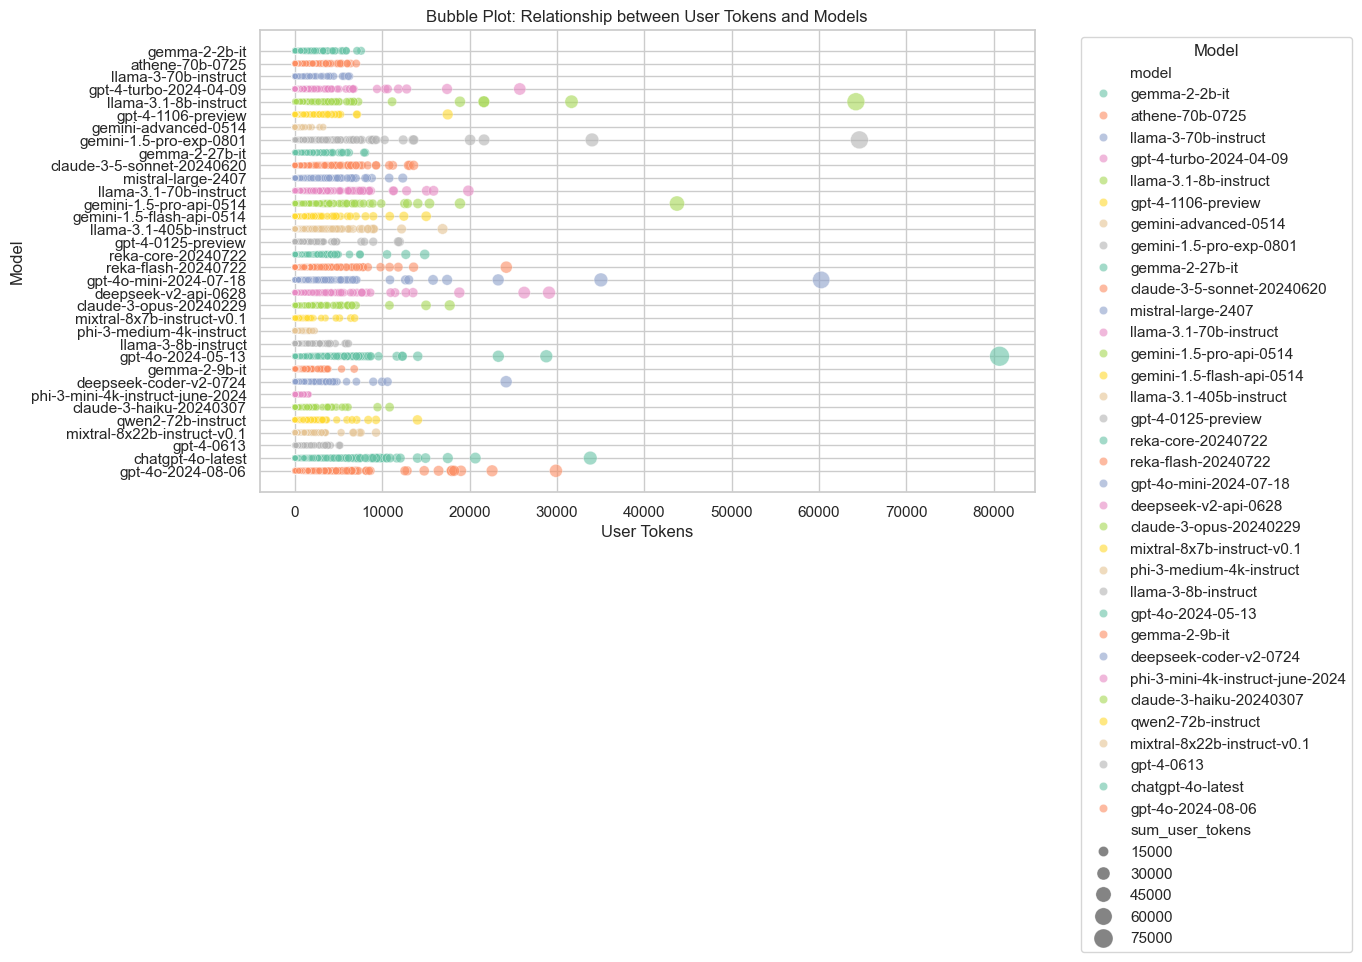

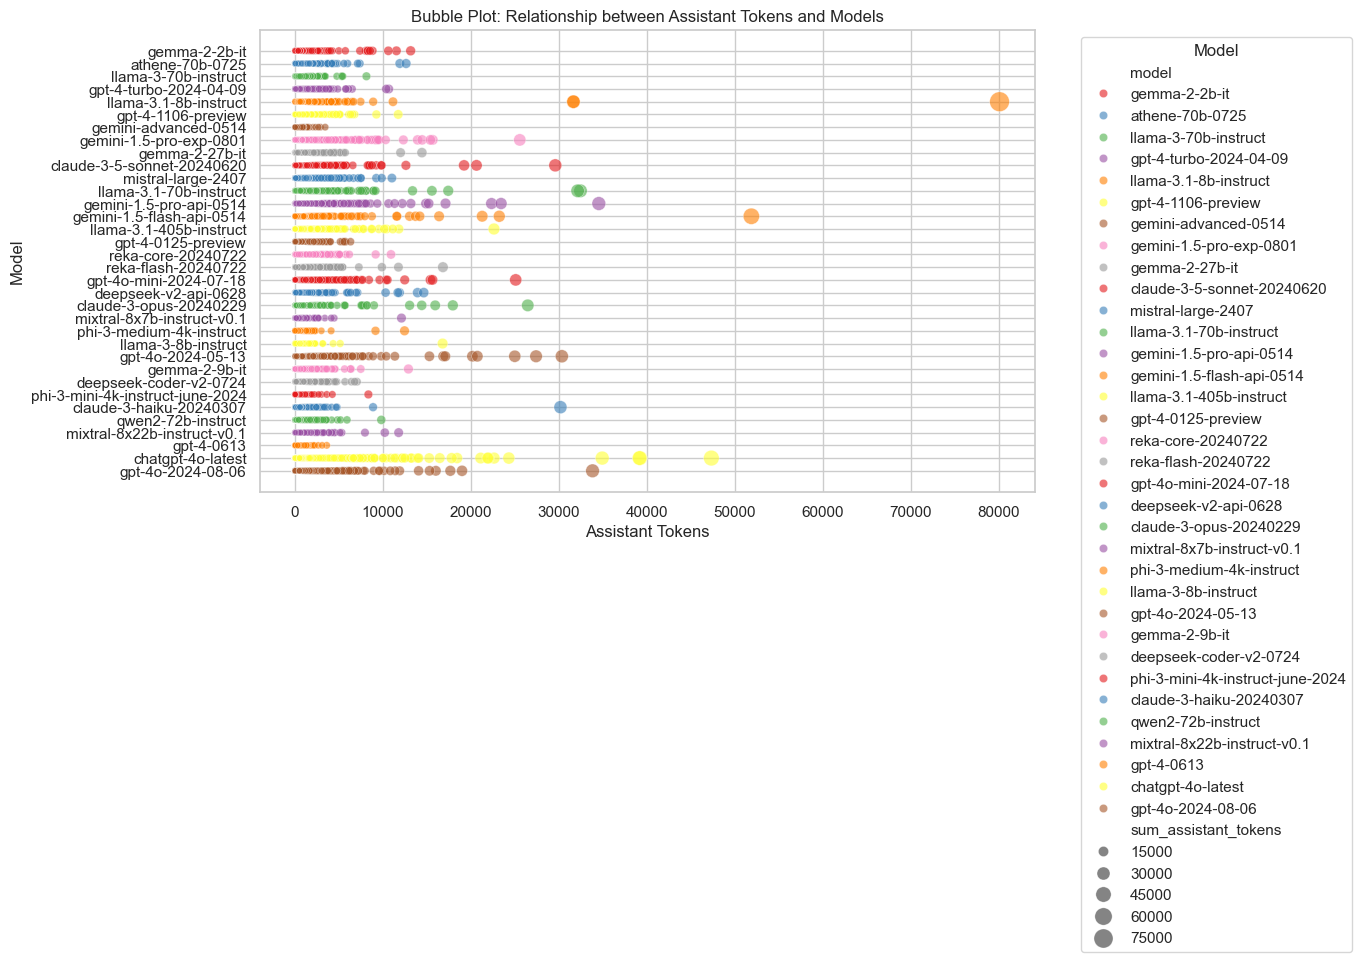

In [23]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Example 1: Bubble plot to show relationship between user tokens and models
plt.figure(figsize=(10, 6))
bubble_plot = sns.scatterplot(
    data=data, 
    x="sum_user_tokens", 
    y="model", 
    size="sum_user_tokens", 
    hue="model", 
    sizes=(20, 200),  # Adjusting the bubble size
    alpha=0.6, 
    palette="Set2"
)
plt.title('Bubble Plot: Relationship between User Tokens and Models')
plt.xlabel('User Tokens')
plt.ylabel('Model')
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Example 2: Bubble plot to show relationship between assistant tokens and models
plt.figure(figsize=(10, 6))
bubble_plot = sns.scatterplot(
    data=data, 
    x="sum_assistant_tokens", 
    y="model", 
    size="sum_assistant_tokens", 
    hue="model", 
    sizes=(20, 200),  # Adjusting the bubble size
    alpha=0.6, 
    palette="Set1"
)
plt.title('Bubble Plot: Relationship between Assistant Tokens and Models')
plt.xlabel('Assistant Tokens')
plt.ylabel('Model')
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The two above **bubble plots** outline the relationship of token usage-(user and assistant) with different models. In each of these plots, the size of each of the bubbles denotes the number of tokens, larger-sized bubbles being indicative of higher token usage. The first plot shows the relationship between user tokens and models, the second between assistant tokens and the same.

These plots are informative for the idea of different model behaviors in light of variable numbers of input tokens and could further drive model development by the identification of models that manage tokens more efficiently, as well as model selection by picking out models suitable for token-intensive tasks.

### Comparison of User Tokens vs Assistant Tokens

<Figure size 800x600 with 0 Axes>

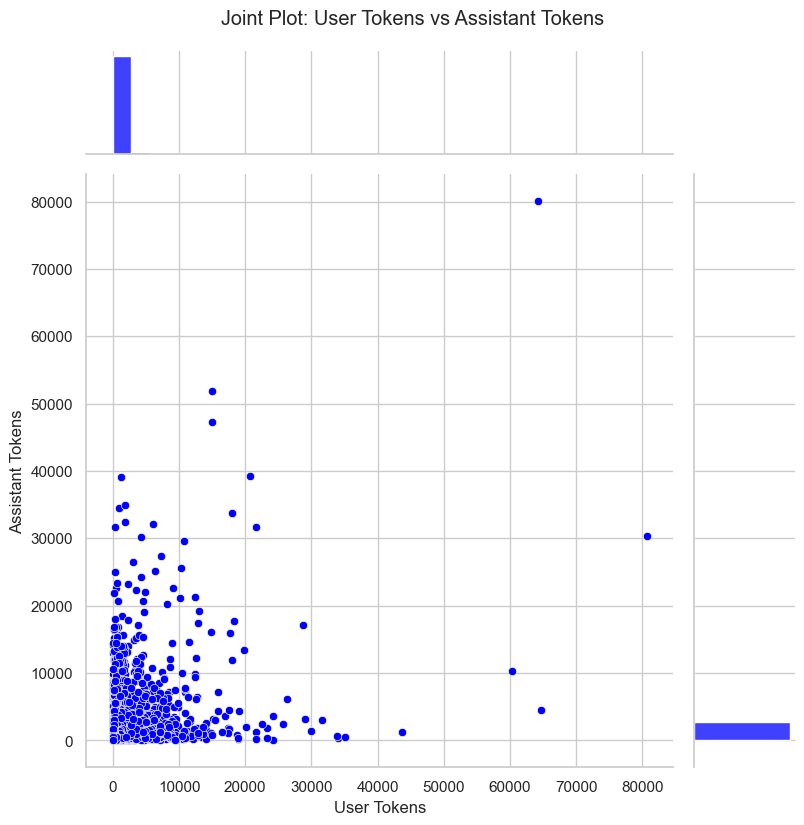

In [24]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Joint Plot: Compare user tokens and assistant tokens
plt.figure(figsize=(8, 6))
sns.jointplot(
    data=data, 
    x="sum_user_tokens", 
    y="sum_assistant_tokens", 
    kind="scatter",  # You can also use 'hex' for hexbin plots or 'kde' for KDE plots
    color="blue", 
    height=8,  # Adjust the size of the plot
    marginal_kws=dict(bins=30, fill=True)
)

plt.suptitle('Joint Plot: User Tokens vs Assistant Tokens', y=1.03)
plt.xlabel('User Tokens')
plt.ylabel('Assistant Tokens')
plt.show()

This is a **joint plot** showing the relation between user tokens and assistant tokens. The scatter plot in the middle shows the distribution of these tokens, and the histograms on top and right show the frequency distributions for user and assistant tokens, respectively.

This plot is useful for model development and model selection, as it shows the relation between how many input-user tokens-are given and how many output-assistant tokens-are returned by a number of models. The plot can help in the optimization of the token usage for efficiency and locating models that handle inputs or outputs with a large count of tokens efficiently.